# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

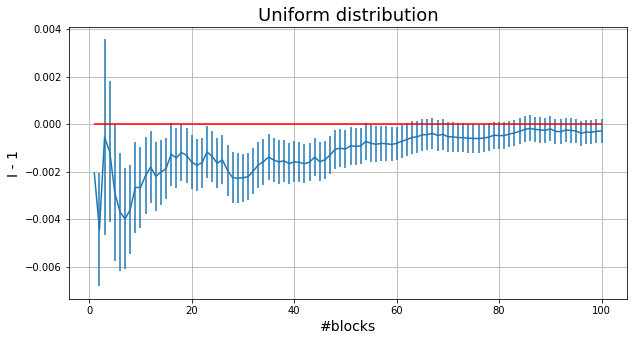

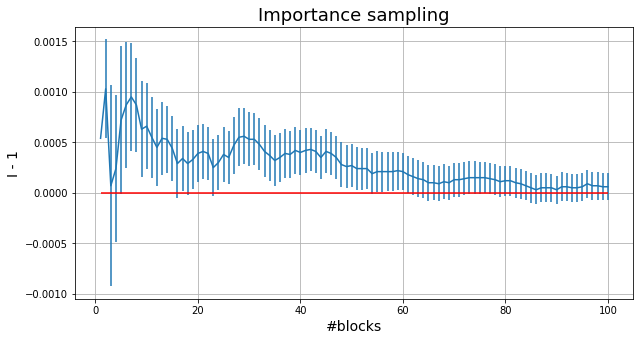

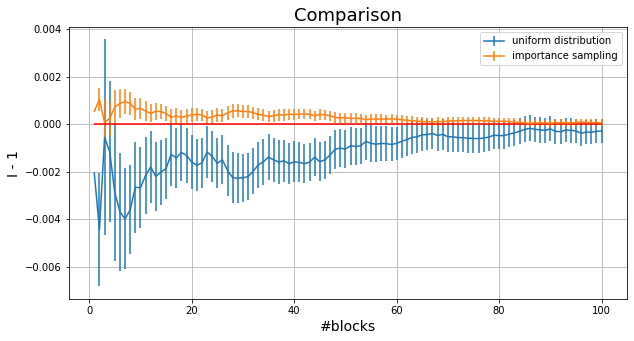

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_ud = np.loadtxt("02.1/02.1_results_ud.csv", delimiter = "," , usecols = range(3))

plt.figure(figsize = (10,5))
plt.errorbar(data_ud[:,0], data_ud[:,1] - 1 , yerr=data_ud[:,2])
plt.xlabel('#blocks', fontsize =14)
plt.ylabel("I - 1", fontsize =14)
plt.title("Uniform distribution", fontsize =18)
plt.hlines(0,data_ud[0,0], data_ud[-1,0], color ='red')
plt.grid(True)
plt.show()

data_is = np.loadtxt("02.1/02.1_results_is.csv", delimiter = "," , usecols = range(3))

plt.figure(figsize=(10,5))
plt.errorbar(data_is[:,0], data_is[:,1] - 1 , yerr=data_is[:,2])
plt.xlabel('#blocks', fontsize =14)
plt.ylabel("I - 1", fontsize =14)
plt.title("Importance sampling", fontsize =18)
plt.hlines(0,data_is[0,0], data_is[-1,0], color ='red')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.errorbar(data_ud[:,0], data_ud[:,1] - 1 , yerr=data_ud[:,2], label = 'uniform distribution')
plt.errorbar(data_is[:,0], data_is[:,1] - 1 , yerr=data_is[:,2], label = 'importance sampling')
plt.xlabel('#blocks', fontsize =14)
plt.ylabel("I - 1", fontsize =14)
plt.title("Comparison", fontsize =18)
plt.hlines(0,data_is[0,0], data_is[-1,0], color ='red')
plt.grid(True)
plt.legend()
plt.show()

As can be seen from the graphs the importance sampling has lower uncertainty values compared to the uniform distribution. The results in both cases are $\sigma$-compatible.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

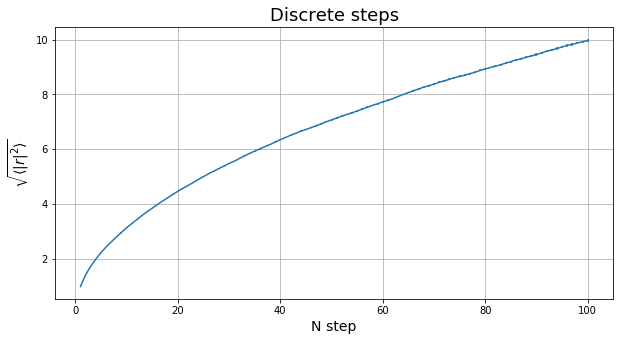

fit function: f(x) = a * x ** b
fit parameters: a = 1.001 \pm 0.002, b = 0.4993 \pm 0.0005
diffusive behaviour for b = 0.5


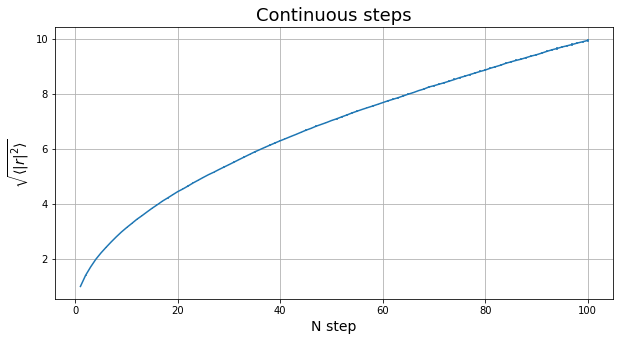

fit function: f(x) = a * x ** b
fit parameters: a = 0.992 \pm 0.001, b = 0.5005 \pm 0.0003
diffusive behaviour for b = 0.5


In [4]:
from scipy import optimize

def test_func(x, a, b):
    return a * x ** b 

data_discrete = np.loadtxt("02.2/02.2_results_discrete.csv", delimiter = ",")

plt.figure(figsize=(10,5))
plt.errorbar(data_discrete[:,0], data_discrete[:,1], yerr=data_discrete[:,2])
plt.xlabel('N step',fontsize =14)
plt.ylabel(r'$ \sqrt{\langle|r|^2\rangle} $',fontsize =14)
plt.title("Discrete steps",fontsize =18)
plt.grid(True)
plt.show()


params, params_covariance = optimize.curve_fit(test_func, data_discrete[:,0], data_discrete[:,1], p0=[2, 0.5])
print("fit function: f(x) = a * x ** b")
print('fit parameters: a = {:.3f} \pm {:.3f}, b = {:.4f} \pm {:.4f}'.format(params[0],np.sqrt(params_covariance[0,0]), 
                                                                      params[1], np.sqrt(params_covariance[1,1 ])),)
print("diffusive behaviour for b = 0.5")

data_continuum = np.loadtxt("02.2/02.2_results_continuum.csv", delimiter = ",")

plt.figure(figsize=(10,5))
plt.errorbar(data_continuum[:,0], data_continuum[:,1], yerr=data_continuum[:,2])
plt.xlabel('N step', fontsize =14)
plt.ylabel(r'$ \sqrt{\langle|r|^2\rangle} $', fontsize =14)
plt.title("Continuous steps", fontsize =18)
plt.grid(True)
plt.show()


params, params_covariance = optimize.curve_fit(test_func, data_continuum[:,0], data_continuum[:,1], p0=[2, 0.5])
print("fit function: f(x) = a * x ** b")
print('fit parameters: a = {:.3f} \pm {:.3f}, b = {:.4f} \pm {:.4f}'.format(params[0],np.sqrt(params_covariance[0,0]), 
                                                                      params[1], np.sqrt(params_covariance[1,1 ])),)
print("diffusive behaviour for b = 0.5")

The results are $2\sigma$-compatible with a diffusive behaviour.